In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.stats import linregress
from scipy import stats
from datetime import date

In [2]:
# Read in NC data CSV and create DataFrame
nc_data = pd.read_csv("../north-carolina-history.csv")

In [3]:
# Fill N/A columns with zeroes and display DataFrame
nc_clean_df = nc_data.fillna(0)
nc_clean_df.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,3/4/20,NC,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
1,3/5/20,NC,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2,3/6/20,NC,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
3,3/7/20,NC,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
4,3/8/20,NC,0.0,0.0,0,0.0,0.0,0.0,0.0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


In [4]:
# Display totals for antigen and viral test columns
total_nc_clean_df = nc_clean_df.max()
total_nc_clean_df

date                                   9/9/20
state                                      NC
death                                 11502.0
deathConfirmed                        10169.0
deathIncrease                             169
deathProbable                          1333.0
hospitalized                              0.0
hospitalizedCumulative                    0.0
hospitalizedCurrently                  3990.0
hospitalizedIncrease                        0
inIcuCumulative                           0.0
inIcuCurrently                          880.0
negative                                  0.0
negativeIncrease                            0
negativeTestsAntibody                     0.0
negativeTestsPeopleAntibody               0.0
negativeTestsViral                        0.0
onVentilatorCumulative                    0.0
onVentilatorCurrently                     0.0
positive                               872176
positiveCasesViral                   759617.0
positiveIncrease                  

In [5]:
# Create variables for total antigen and viral tests, as well as a list holding both values
total_antigen = total_nc_clean_df['totalTestsAntigen']
total_viral = total_nc_clean_df['totalTestsViral']
total_tests = [total_antigen.astype(int), total_viral.astype(int)]

In [6]:
# Format pie chart
colors = ["lightskyblue", "lightcoral"]
labels = ["Antigen", "Viral"]
explode = (0, 0.1)

<IPython.core.display.Javascript object>


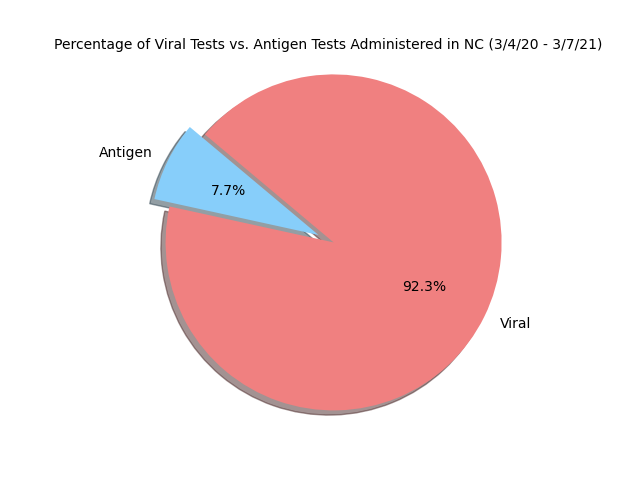

In [7]:
# Create pie chart comparing percent of viral vs. antigen tests administered
plt.pie(total_tests, labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=140)
fontsize = 10
plt.title("Percentage of Viral Tests vs. Antigen Tests Administered in NC (3/4/20 - 3/7/21)", fontsize=fontsize)
plt.axis("equal")
plt.show()

In [8]:
# Create clean DataFrame with inf and -inf values replaced with zeroes. Create a variable for negative test rate
nc_clean_df = nc_clean_df.replace([np.nan, -np.inf], 0)
negative_total_rate = ((nc_clean_df['totalTestResultsIncrease'].astype(int) - nc_clean_df['positiveIncrease'].astype(int)) / nc_clean_df['totalTestResultsIncrease'].astype(int)) * 100

In [9]:
# Create DataFrame displaying negative test rate values for each day
rate_df = pd.DataFrame({"Date": nc_clean_df['date'], "Negative Rate": negative_total_rate})
rate_df

,Date,Negative Rate
0,3/4/20,NaN
1,3/5/20,NaN
2,3/6/20,-inf
3,3/7/20,NaN
4,3/8/20,NaN
...,...,...
364,3/3/21,89.262115
365,3/4/21,94.320091
366,3/5/21,95.295255
367,3/6/21,94.756041


In [10]:
# Drop rows with NaN values
dropped_rate_df = rate_df.dropna()
dropped_rate_df

,Date,Negative Rate
2,3/6/20,-inf
6,3/10/20,-inf
8,3/12/20,-inf
9,3/13/20,-inf
10,3/14/20,-inf
...,...,...
363,3/2/21,92.443740
364,3/3/21,89.262115
365,3/4/21,94.320091
366,3/5/21,95.295255


In [11]:
# Replace inf and -inf values with zeroes and reset index
replaced_rate_df = dropped_rate_df.replace([np.inf, -np.inf], 0)
reset_df = replaced_rate_df.reset_index(drop=True)
reset_df

,Date,Negative Rate
0,3/6/20,0.000000
1,3/10/20,0.000000
2,3/12/20,0.000000
3,3/13/20,0.000000
4,3/14/20,0.000000
...,...,...
357,3/2/21,92.443740
358,3/3/21,89.262115
359,3/4/21,94.320091
360,3/5/21,95.295255


In [12]:
# Drop rows with no tests and reset index
replaced_time_df = reset_df.drop(rate_df.index[0:7])
replaced_time_df = replaced_time_df.reset_index(drop=True)
replaced_time_df

,Date,Negative Rate
0,3/17/20,99.252137
1,3/18/20,92.203390
2,3/19/20,83.414634
3,3/20/20,97.641509
4,3/21/20,95.015907
...,...,...
350,3/2/21,92.443740
351,3/3/21,89.262115
352,3/4/21,94.320091
353,3/5/21,95.295255


<IPython.core.display.Javascript object>


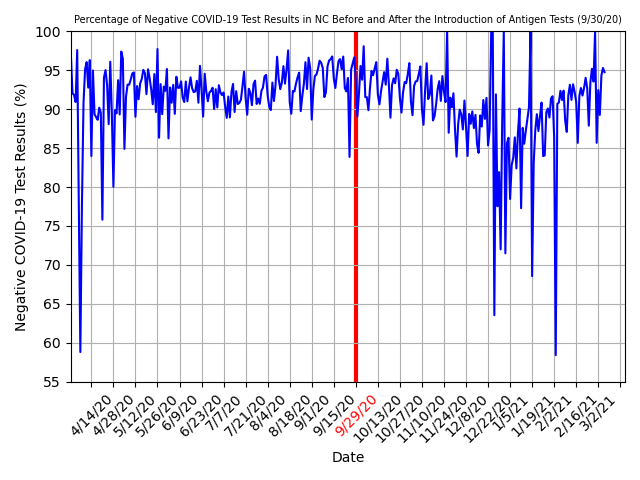

In [13]:
# Create line chart showing negative test rate over time.
fig, ax = plt.subplots(1)
plt.plot(replaced_time_df['Date'], replaced_time_df['Negative Rate'], color="blue")

# Use "MultipleLocator" (reference: https://www.studytonight.com/matplotlib/formatting-the-axes-in-matplotlib) to determine which dates appear on x-axis
ax.xaxis.set_major_locator(MultipleLocator(14))
ax.tick_params(axis='x', rotation=45)

# Highlight tick for last date without antigen testing and create a red line at the value (references: https://stackoverflow.com/questions/41924963/formatting-only-selected-tick-labels , https://stackoverflow.com/questions/32073616/matplotlib-change-color-of-individual-grid-lines)
# Create grid lines
ax.get_xticklabels()[-17].set_color("red")
ax.xaxis.grid(True)
ax.yaxis.grid(True)
a = ax.get_xgridlines()
antigen_date = a[-17]
antigen_date.set_color('red')
antigen_date.set_linewidth(3)

# Set axis limits and format titles/labels
plt.xlim(15,367)
plt.ylim(55,100)
fontsize = 7
plt.title("Percentage of Negative COVID-19 Test Results in NC Before and After the Introduction of Antigen Tests (9/30/20)", fontsize=fontsize)
plt.xlabel("Date")
plt.ylabel("Negative COVID-19 Test Results (%)")
fig.tight_layout()
plt.show()

In [14]:
# Create DataFrame for dates before antigen tests were administered
# Use date ordinal values in order to display regression line in scatter plot (reference: https://stackoverflow.com/questions/20576618/pandas-datetime-column-to-ordinal)
pre_antigen_df = replaced_time_df.drop(rate_df.index[197:355])
pre_antigen_df['Date Ordinal'] = pd.to_datetime(pre_antigen_df['Date']).apply(lambda date: date.toordinal())
pre_antigen_df

/var/folders/_0/z435wnvn6236c4cm5wmb3_4w0000jc/T/ipykernel_76373/376248431.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pre_antigen_df['Date Ordinal'] = pd.to_datetime(pre_antigen_df['Date']).apply(lambda date: date.toordinal())


,Date,Negative Rate,Date Ordinal
0,3/17/20,99.252137,737501
1,3/18/20,92.203390,737502
2,3/19/20,83.414634,737503
3,3/20/20,97.641509,737504
4,3/21/20,95.015907,737505
...,...,...,...
192,9/25/20,83.866562,737693
193,9/26/20,95.087827,737694
194,9/27/20,95.877541,737695
195,9/28/20,96.650330,737696


In [15]:
# Create DataFrame for dates after antigen tests were administered
# Use date ordinal values in order to display regression line in scatter plot
post_antigen_df = replaced_time_df.drop(rate_df.index[0:197])
post_antigen_df['Date Ordinal'] = pd.to_datetime(post_antigen_df['Date']).apply(lambda date: date.toordinal())
post_antigen_df

/var/folders/_0/z435wnvn6236c4cm5wmb3_4w0000jc/T/ipykernel_76373/2308807840.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  post_antigen_df['Date Ordinal'] = pd.to_datetime(post_antigen_df['Date']).apply(lambda date: date.toordinal())


,Date,Negative Rate,Date Ordinal
197,9/30/20,89.067642,737698
198,10/1/20,92.031217,737699
199,10/2/20,95.548478,737700
200,10/3/20,93.784226,737701
201,10/4/20,98.087115,737702
...,...,...,...
350,3/2/21,92.443740,737851
351,3/3/21,89.262115,737852
352,3/4/21,94.320091,737853
353,3/5/21,95.295255,737854


<IPython.core.display.Javascript object>


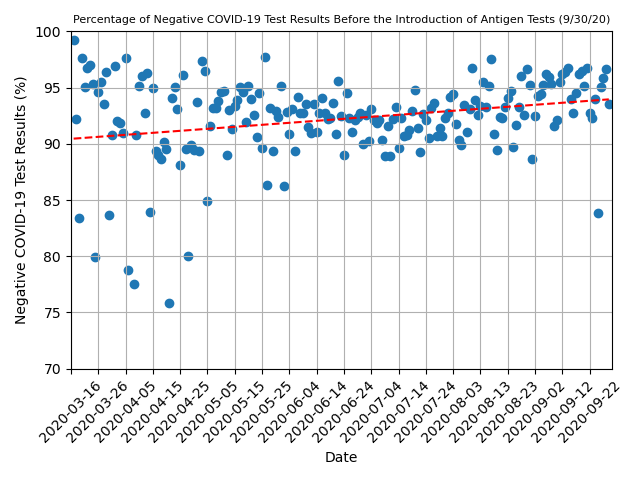

/var/folders/_0/z435wnvn6236c4cm5wmb3_4w0000jc/T/ipykernel_76373/11677259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


In [16]:
# Create scatter plot for negative test rates per day before antigen tests were administered
fig, ax = plt.subplots()
ax.scatter(pre_antigen_df['Date Ordinal'], pre_antigen_df["Negative Rate"])

# Format title/labels and set x and y limits
fontsize = 8
plt.title("Percentage of Negative COVID-19 Test Results Before the Introduction of Antigen Tests (9/30/20)", fontsize=fontsize)
plt.ylabel("Negative COVID-19 Test Results (%)")
ax.set_xlim(pre_antigen_df['Date Ordinal'].min() - 1, pre_antigen_df['Date Ordinal'].max() + 1)
ax.set_ylim(0, pre_antigen_df["Negative Rate"].max() + 1)

# Use MultipleLocator to display dates on x axis
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.tick_params(axis='x', rotation=45)

ax.set_xlabel('Date')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

# Create line of regression for negative test rate values and plot on graph
pre_date = pre_antigen_df['Date Ordinal']
pre_rate = pre_antigen_df['Negative Rate']
pre_slope, pre_int, pre_r, pre_p, pre_std_err = stats.linregress(pre_date, pre_rate)
pre_fit = pre_slope * pre_date + pre_int
line_eq = "y = " + str(round(pre_slope,2)) + "x + " + str(round(pre_int,2))
ax.plot(pre_date,pre_fit,"--", color = 'r')
plt.ylim(70,100)

plt.grid()
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


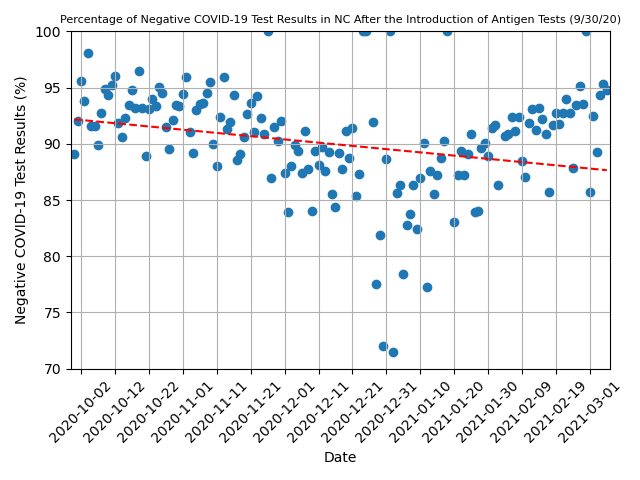

/var/folders/_0/z435wnvn6236c4cm5wmb3_4w0000jc/T/ipykernel_76373/3889816415.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


In [17]:
# Create scatter plot for negative test rates per day after antigen tests were administered
fig, ax = plt.subplots()
ax.scatter(post_antigen_df['Date Ordinal'], post_antigen_df["Negative Rate"])

# Format title/labels and set x and y limits
fontsize = 8
plt.title("Percentage of Negative COVID-19 Test Results in NC After the Introduction of Antigen Tests (9/30/20)", fontsize=fontsize)
plt.ylabel("Negative COVID-19 Test Results (%)")
ax.set_xlim(post_antigen_df['Date Ordinal'].min() - 1, post_antigen_df['Date Ordinal'].max() + 1)
ax.set_ylim(0, post_antigen_df["Negative Rate"].max() + 1)

# Use MultipleLocator to display dates on x axis
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.tick_params(axis='x', rotation=45)

ax.set_xlabel('Date')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

# Create line of regression for negative test rate values and plot on graph
post_date = post_antigen_df['Date Ordinal']
post_rate = post_antigen_df['Negative Rate']
post_slope, post_int, post_r, post_p, post_std_err = stats.linregress(post_date, post_rate)
post_fit = post_slope * post_date + post_int
line_eq = "y = " + str(round(post_slope,2)) + "x + " + str(round(post_int,2))
ax.plot(post_date,post_fit,"--", color = 'r')
plt.ylim(70,100)

plt.grid()
fig.tight_layout()
plt.show()